In [2]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib
from sklearn import datasets
import seaborn as sns

In [3]:
CVD = pd.read_csv(r'C:\Users\rafid\OneDrive\Desktop\ML Project\full_data.csv', encoding='latin-1')

In [4]:
print(CVD.dtypes)

date                object
location            object
new_cases          float64
new_deaths         float64
total_cases        float64
total_deaths       float64
weekly_cases       float64
weekly_deaths      float64
biweekly_cases     float64
biweekly_deaths    float64
dtype: object


In [5]:
CVD['date'] = [dt.datetime.strptime(x,'%m/%d/%Y') for x in CVD['date']]
print(CVD.dtypes)


date               datetime64[ns]
location                   object
new_cases                 float64
new_deaths                float64
total_cases               float64
total_deaths              float64
weekly_cases              float64
weekly_deaths             float64
biweekly_cases            float64
biweekly_deaths           float64
dtype: object


In [6]:
CVD = CVD.rename(columns={' location ': 'location'})
CVD = CVD.rename(columns={' new_cases ': 'new_cases'})
CVD = CVD.rename(columns={' new_deaths ': 'new_deaths'})
CVD = CVD.rename(columns={' total_cases ': 'total_cases'})
CVD = CVD.rename(columns={' total_deaths ': 'total_deaths'})
CVD = CVD.rename(columns={' date ': 'date'})

In [7]:
countries = ['Bangladesh', 'Pakistan']
CVD_country = CVD[CVD.location.isin(countries)]
CVD_country.set_index('date', inplace = True)
print(CVD_country.head())

              location  new_cases  new_deaths  total_cases  total_deaths  \
date                                                                       
2020-03-09  Bangladesh        3.0         0.0          3.0           NaN   
2020-03-15  Bangladesh        0.0         0.0          3.0           NaN   
2020-03-16  Bangladesh        NaN         NaN          NaN           NaN   
2020-03-17  Bangladesh        2.0         0.0          5.0           NaN   
2020-03-18  Bangladesh        3.0         0.0          8.0           NaN   

            weekly_cases  weekly_deaths  biweekly_cases  biweekly_deaths  
date                                                                      
2020-03-09           NaN            NaN             NaN              NaN  
2020-03-15           3.0            0.0             NaN              NaN  
2020-03-16           0.0            0.0             NaN              NaN  
2020-03-17           2.0            0.0             NaN              NaN  
2020-03-18       

In [8]:
CVD_country = CVD_country.copy()
CVD_country['mortality_rate'] = CVD_country['total_deaths']/CVD_country['total_cases']

Text(0.5, 1.0, 'Total Deaths')

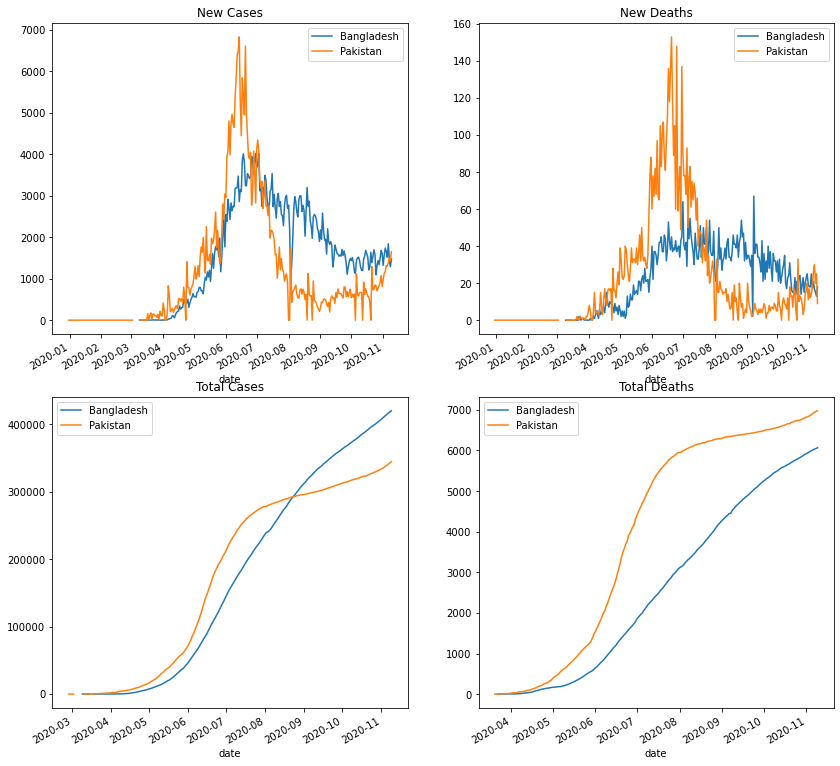

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

CVD_country.groupby('location')['new_cases'].plot(ax=axes[0,0], legend=True) #for log scale add logy=True
CVD_country.groupby('location')['new_deaths'].plot(ax=axes[0,1], legend=True)
CVD_country.groupby('location')['total_cases'].plot(ax=axes[1,0], legend=True)
CVD_country.groupby('location')['total_deaths'].plot(ax=axes[1,1], legend=True)
#CVD_country.groupby('location')['mortality_rate'].plot(ax=axes[1,1], legend=True)
#CVD_country.to_csv('data/output.csv')

axes[0, 0].set_title("New Cases")
axes[0, 1].set_title("New Deaths")
axes[1, 0].set_title("Total Cases")
axes[1, 1].set_title("Total Deaths")

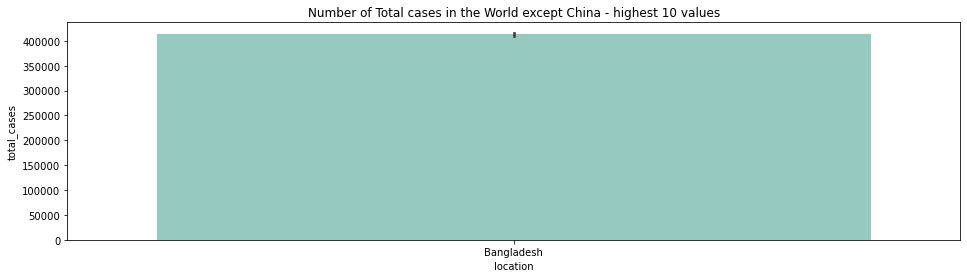

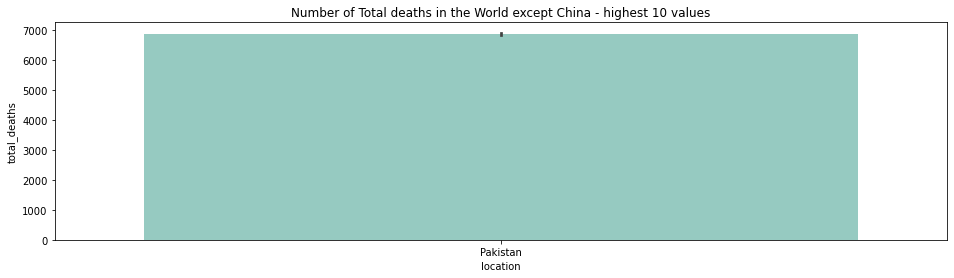

In [12]:
def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(df[feature][0:10], df[value][0:10], palette='Set3')
    g.set_title("Number of {} - highest 10 values".format(title))
    plt.show()    


plot_bar('location', 'total_cases', 'Total cases in the World except China', CVD_country, size=4)
plot_bar('location', 'total_deaths', 'Total deaths in the World except China', CVD_country, size=4)